In [41]:
import json
with open('lmg_pretrained_pipeline_v2.json', 'r') as f:
    data = json.load(f)

In [42]:
import matplotlib.pyplot as plt
from statistics import mean, stdev
import numpy as np

bce_weights = sorted([i['parameters']['bce_weight'] for i in data])

def statistics_per_key(list_of_dict):
    keys = list_of_dict[0].keys()
    result = {}
    for key in keys:
        result[key] = [mean([i[key] for i in list_of_dict]), stdev([i[key] for i in list_of_dict]), len(list_of_dict)]
    return result

statistics = []
for bce in bce_weights:
    trials = sum([i['trials'] for i in data if i['parameters']['bce_weight'] == bce], [])
    datas = []
    for trial in trials:
        best_epoch_index = np.argmax([i['valid_mcc'] for i in trial])
        best_epoch = trial[best_epoch_index]
        datas.append(best_epoch)
    statistics.append({'bce_weight': bce, 'statistics': statistics_per_key(datas)})
    print(statistics[-1])


{'bce_weight': 0.25, 'statistics': {'micro_auroc': [0.9121283143758774, 0.007070984049000965, 4], 'mcc': [0.5425496149722431, 0.03515439586507162, 4], 'accuracy': [0.9574384540319443, 0.006692916665684324, 4], 'precision': [0.6261610835790634, 0.1118712444289978, 4], 'sensitivity': [0.5155502408742905, 0.05935321188103155, 4], 'specificity': [0.9815750569105148, 0.009650719534436369, 4], 'train_bce': [0.004457399141985882, 0.0026242991402651446, 4], 'valid_mcc': [0.5848684427575421, 0.015362571724405368, 4]}}
{'bce_weight': 0.5, 'statistics': {'micro_auroc': [0.9211442321538925, 0.004935518023821919, 4], 'mcc': [0.5505621272477328, 0.01859988587074183, 4], 'accuracy': [0.9603089392185211, 0.0022015626700279288, 4], 'precision': [0.6603064835071564, 0.04885302387285261, 4], 'sensitivity': [0.49561402946710587, 0.05361913378634393, 4], 'specificity': [0.985691249370575, 0.004518481100840472, 4], 'train_bce': [0.02103135820451054, 0.026530985895721056, 4], 'valid_mcc': [0.5977459768942567

sensitivity
[0.5155502408742905, 0.49561402946710587, 0.48763955384492874, 0.5087719261646271, 0.5346889868378639]
[0.05935321188103155, 0.05361913378634393, 0.08074203612523977, 0.0388928060093059, 0.05725913560273168]
[0.25, 0.5, 1, 2, 4]
specificity
[0.9815750569105148, 0.985691249370575, 0.9859744012355804, 0.9873246848583221, 0.9828600138425827]
[0.009650719534436369, 0.004518481100840472, 0.005221618533624808, 0.002527345979119974, 0.004651456653004654]
[0.25, 0.5, 1, 2, 4]
accuracy
[0.9574384540319443, 0.9603089392185211, 0.9601643830537796, 0.9625392407178879, 0.9596481025218964]
[0.006692916665684324, 0.0022015626700279288, 0.0015191944612188647, 0.0005899137034632803, 0.002748367337292143]
[0.25, 0.5, 1, 2, 4]
precision
[0.6261610835790634, 0.6603064835071564, 0.6639245897531509, 0.6888705790042877, 0.6345305144786835]
[0.1118712444289978, 0.04885302387285261, 0.05174514644002475, 0.024992761360337176, 0.042498059731138335]
[0.25, 0.5, 1, 2, 4]
mcc
[0.5425496149722431, 0.5505

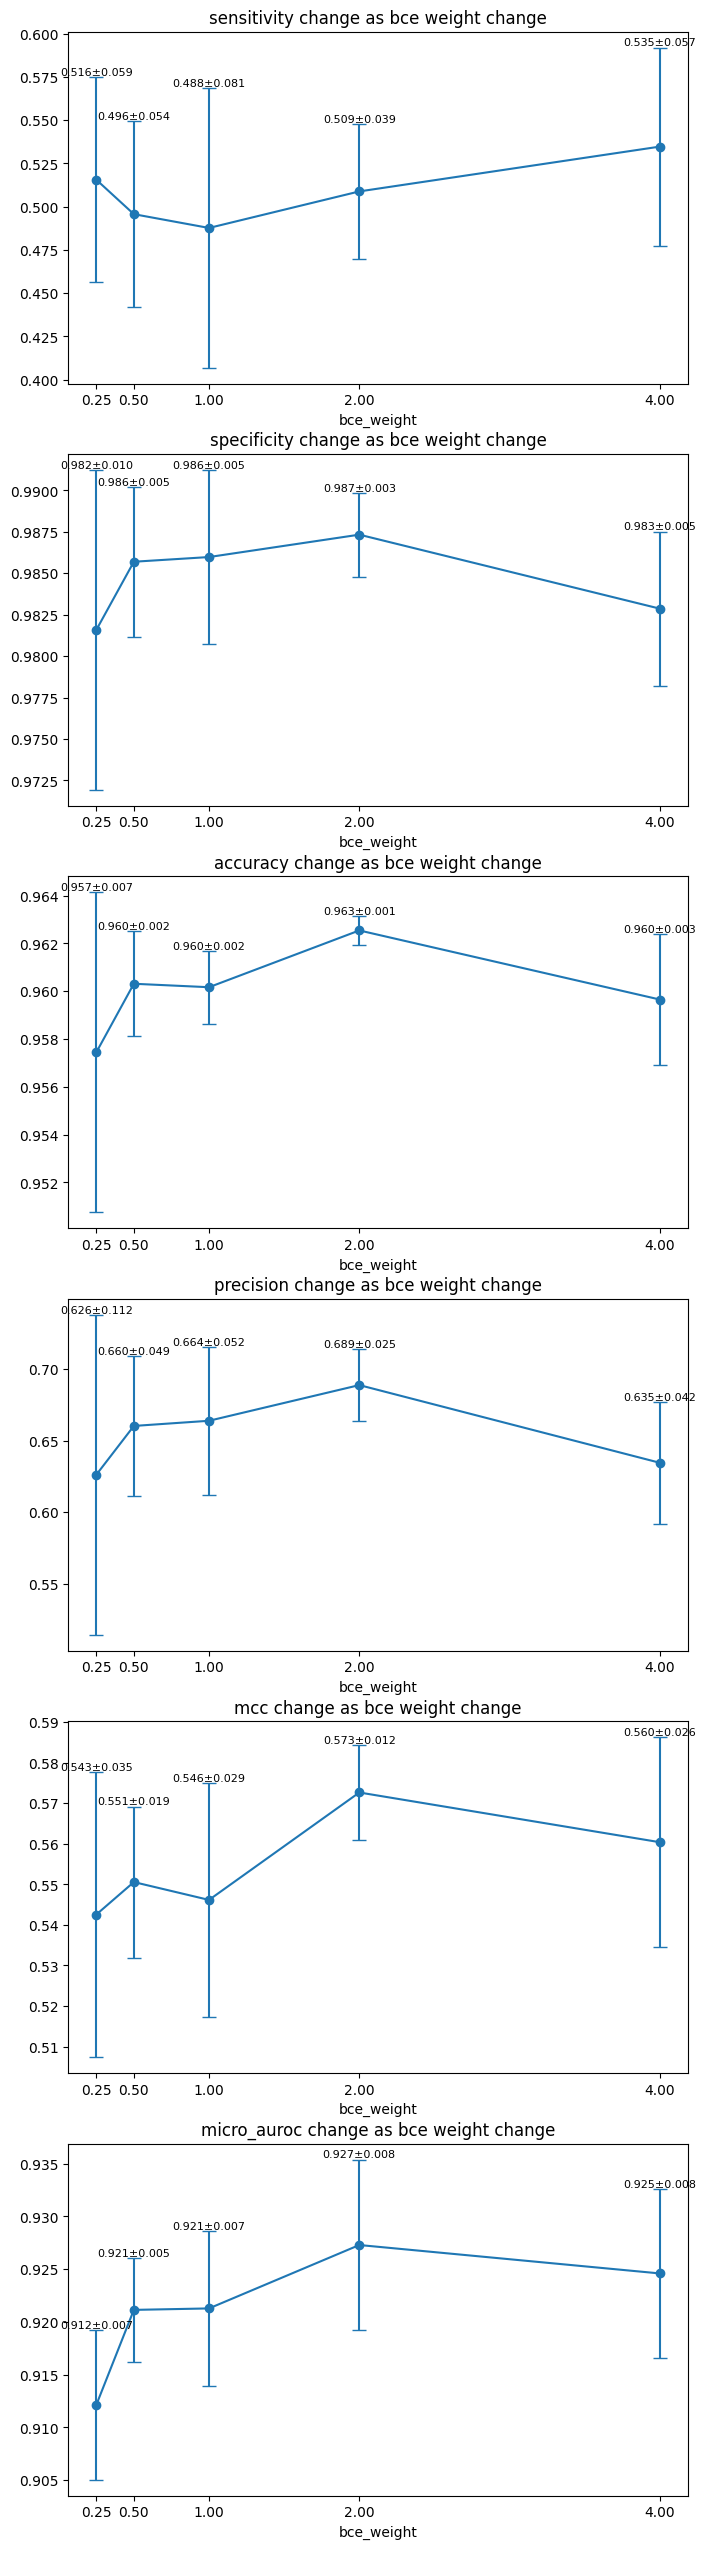

In [43]:
import matplotlib.pyplot as plt

metrics = ['sensitivity', 'specificity', 'accuracy', 'precision', 'mcc', 'micro_auroc']

fig, axs = plt.subplots(6, figsize=(8, 32))

for metric, ax in zip(metrics, axs):
    print(metric)
    metric_avg = [i['statistics'][metric][0] for i in statistics]
    metric_std = [i['statistics'][metric][1] for i in statistics]
    metric_bce_weights = [i['bce_weight'] for i in statistics]
    print(metric_avg)
    print(metric_std)
    print(metric_bce_weights)
    ax.errorbar(metric_bce_weights, metric_avg, yerr=metric_std, fmt='-o', capsize=5)
    ax.set_title(f'{metric} change as bce weight change')
    ax.set_xlabel('bce_weight')
    ax.set_xticks(bce_weights)

    for weight, avg, std in zip(bce_weights, metric_avg, metric_std):
        ax.text(weight, avg+std, f'{avg:.3f}±{std:.3f}', ha='center', va='bottom', fontsize=8)

In [32]:
print(mean([trial[-4]['mcc'] for trial in data[1]['trials']]))
print(mean([trial[-3]['mcc'] for trial in data[1]['trials']]))
print(mean([trial[-2]['mcc'] for trial in data[1]['trials']]))
print(mean([trial[-1]['mcc'] for trial in data[1]['trials']]))

0.5754344998413226
0.5527768495068975
0.5778290869437417
0.5366652368174711
